# 18_Dibetes_model

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import multilabel_confusion_matrix # For separate confusion matrix for each class
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Problem Statement 

# Data Gathering

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

### id

In [5]:
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### SepalLengthCm

In [7]:
df['SepalLengthCm']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

### SepalWidthCm

In [8]:
df['SepalWidthCm']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

### PetalLengthCm

In [9]:
df['PetalLengthCm']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

### PetalWidthCm

In [10]:
df['PetalWidthCm']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Feature Engineering

<AxesSubplot:>

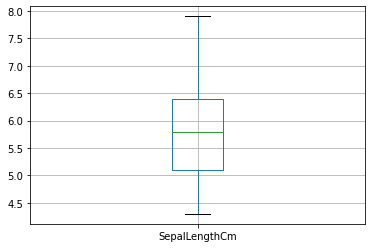

In [13]:
df[['SepalLengthCm']].boxplot()

<AxesSubplot:>

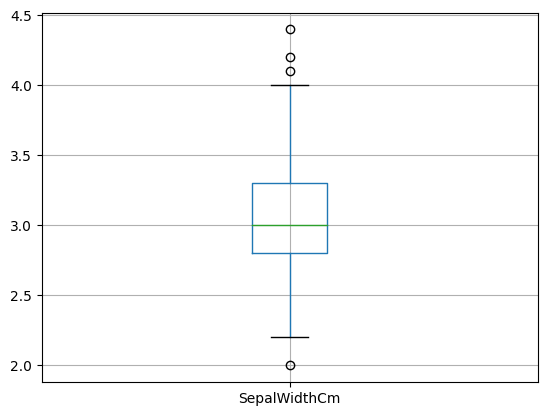

In [20]:
df[['SepalWidthCm']].boxplot()

q1--> 2.8
q2--> 3.0
q3--> 3.3
upper_tail--> 4.05
lower_tail--> 2.05
mean--> 3.0540000000000003
3.0


<AxesSubplot:>

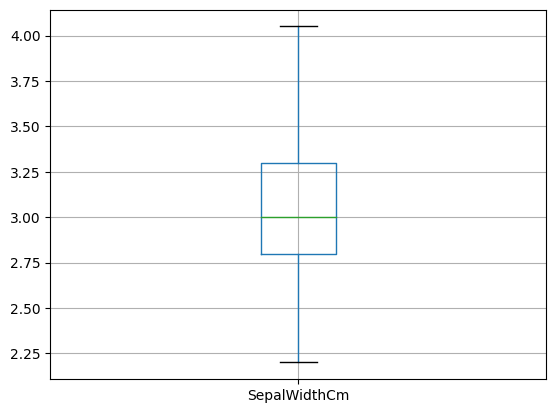

In [21]:
q1=df['SepalWidthCm'].quantile(0.25)
q2=df['SepalWidthCm'].quantile(0.50)
q3=df['SepalWidthCm'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['SepalWidthCm'].mean()))

df['SepalWidthCm'].median()

size_df=df[['SepalWidthCm']].loc[(df['SepalWidthCm'] < upper_tail) & 
                                   (df['SepalWidthCm'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['SepalWidthCm'] > upper_tail) |
                (df['SepalWidthCm'] < lower_tail), 'SepalWidthCm'] = upper_tail


df[['SepalWidthCm']].boxplot()

<AxesSubplot:>

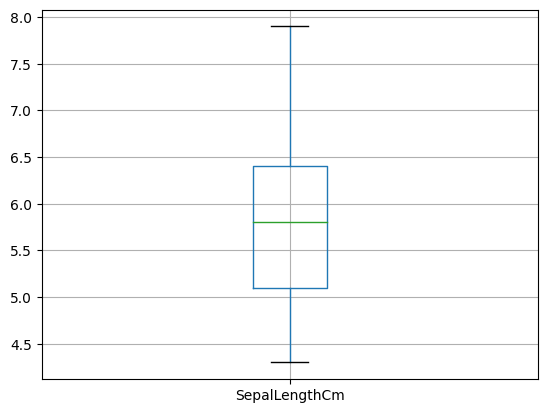

In [18]:
df[['SepalLengthCm']].boxplot()

<AxesSubplot:>

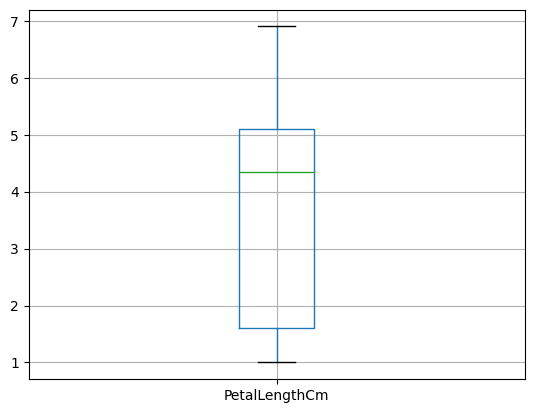

In [19]:
df[['PetalLengthCm']].boxplot()

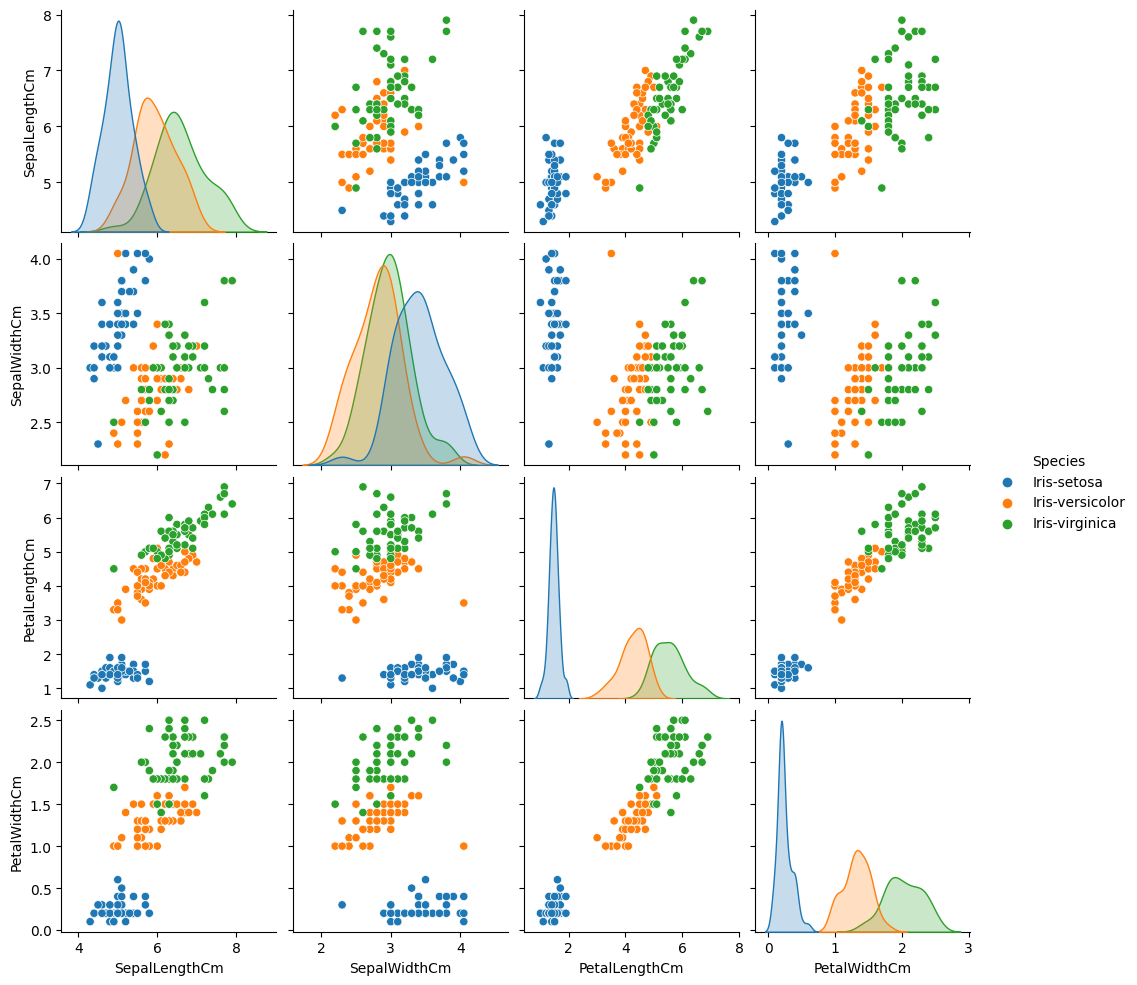

In [22]:
sns.pairplot(df, hue = 'Species')

In [23]:
px.scatter_3d(df, x = df['SepalLengthCm'], y= df['SepalWidthCm'], z= df['PetalLengthCm'], color = df['Species'])

# Train Test Split

In [24]:
x = df.drop('Species', axis = 1)
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=1, stratify=y)

# Model training

In [25]:
iris_model = LogisticRegression(multi_class = 'ovr')
iris_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

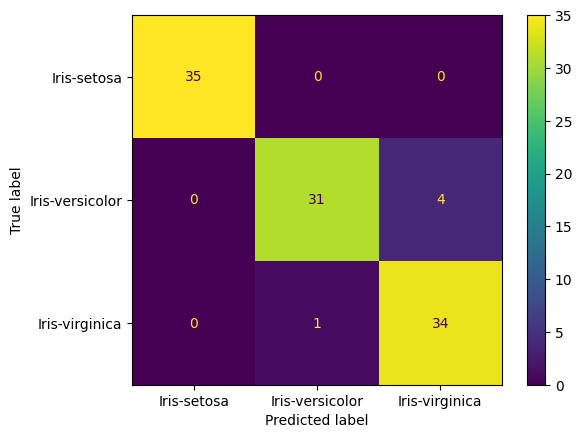

In [26]:
plot_confusion_matrix(iris_model, x_train, y_train)

In [27]:
# Testing data

# prediction
y_pred = iris_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
# Visualization
multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("multilabel_cnf_matrix :\n",multilabel_cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]
*********************************************
multilabel_cnf_matrix :
 [[[30  0]
  [ 0 15]]

 [[29  1]
  [ 3 12]]

 [[27  3]
  [ 1 14]]]
*********************************************
Accuracy Score: 0.9111111111111111
*********************************************
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.80      0.86        15
 Iris-virginica       0.82      0.93      0.87        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



In [28]:
# Training data

# prediction
y_pred_train = iris_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
# Visualization
multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("multilabel_cnf_matrix :\n",multilabel_cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[35  0  0]
 [ 0 31  4]
 [ 0  1 34]]
*********************************************
multilabel_cnf_matrix :
 [[[70  0]
  [ 0 35]]

 [[69  1]
  [ 4 31]]

 [[66  4]
  [ 1 34]]]
*********************************************
Accuracy Score: 0.9523809523809523
*********************************************
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.97      0.89      0.93        35
 Iris-virginica       0.89      0.97      0.93        35

       accuracy                           0.95       105
      macro avg       0.95      0.95      0.95       105
   weighted avg       0.95      0.95      0.95       105



# AUC-ROC Curve

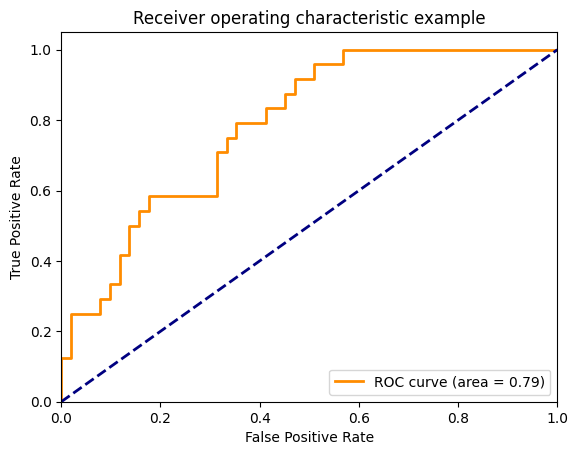

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


# Testing on a Single row

In [29]:
x.head(1).T

,0
SepalLengthCm,5.1
SepalWidthCm,3.5
PetalLengthCm,1.4
PetalWidthCm,0.2


In [30]:
x.head(1).T.shape

(4, 1)

In [31]:
columns = x.columns
print(columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [54]:
# user intput

SepalLengthCm = 4
SepalWidthCm = 3
PetalLengthCm = 2.5
PetalWidthCm = 1.5

In [55]:
columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [56]:
array = np.zeros(columns.shape[0],dtype = int)
array

array([0, 0, 0, 0])

In [57]:
len(columns)

4

In [58]:
array = np.zeros(columns.shape[0],dtype = int)
array[0] = SepalLengthCm
array[1] = SepalWidthCm
array[2] = PetalLengthCm
array[3] = PetalWidthCm
array

array([4, 3, 2, 1])

In [59]:
Species_prediction = iris_model.predict([array])[0]
Species_prediction

'Iris-setosa'

In [61]:
# store all this column is json 
iris_data  = {"columns":list(columns)}
iris_data

{'columns': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']}

In [62]:
import json

with open("iris_data.json", "w") as f:
    json.dump(iris_data, f)

In [63]:
# Save Model in Pickle File
import pickle

with open("iris_model.pkl", "wb") as f:
    pickle.dump(iris_model, f)